## Multiple Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Lets look at the advertising data set
ad_df = pd.read_csv('datasets/advertising.csv')
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


---------------------

### Create different multi predictor models

In [3]:
# Initialize a list to store the MSE values
mse_list = []

# Create a list of lists of all unique predictor combinations
# For example, if you have 2 predictors, A and B, you would end up with:
# [['A'], ['B'], ['A', 'B']]
cols = [['TV'], ['Radio'], ['Newspaper'], ['TV', 'Radio'], ['TV', 'Newspaper'], 
        ['Radio', 'Newspaper'], ['TV', 'Radio', 'Newspaper']]

# Loop over all predictor combinations:
for i in cols:

    # Set each of the predictors from the previous list as x:
    x = ad_df[i]

    # Set the "sales" column as the response variable:
    y = ad_df['Sales']

    # Split the data into train-test sets with 80% training data and 20% testing data.
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data:
    lreg.fit(x_train, y_train)

    # Predict the response variable for the test set using the trained model
    y_pred = lreg.predict(x_test)

    # Compute the MSE for the test data:
    MSE = mean_squared_error(y_test, y_pred)

    # Append the computed MSE to the initialized list:
    mse_list.append(MSE)

In [4]:
# Take a quick look at the mse_list to ensure it's populated:
mse_list

[6.639091226559303,
 30.800740055187482,
 34.972705918316024,
 4.476818366208145,
 5.93963320856206,
 31.445129067266254,
 4.522552562041294]

### Display the MSE with predictor combinations

In [5]:
# Helper code to display the MSE for each predictor combination:
t = PrettyTable(['Predictors', 'MSE'])

for i in range(len(mse_list)):
    t.add_row([cols[i], round(mse_list[i], 3)])

print(t)

+------------------------------+--------+
|          Predictors          |  MSE   |
+------------------------------+--------+
|            ['TV']            | 6.639  |
|          ['Radio']           | 30.801 |
|        ['Newspaper']         | 34.973 |
|       ['TV', 'Radio']        | 4.477  |
|     ['TV', 'Newspaper']      |  5.94  |
|    ['Radio', 'Newspaper']    | 31.445 |
| ['TV', 'Radio', 'Newspaper'] | 4.523  |
+------------------------------+--------+


In [6]:
ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [12]:
# check why output doesn't match edx 
# Sales sum is different in this data set so that is likely causing the disconnect
for i in ad_df.columns:
    print(ad_df[i].sum())

29408.5
4652.800000000001
6110.799999999999
3026.1000000000004


--------------------------------------

## Techniques for Multilinear Modeling

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Load the credit data:
df_credit = pd.read_csv('datasets/Credit.csv')
df_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [15]:
# The response variable will be 'Balance'
x = df_credit.drop('Balance', axis=1)
y = df_credit['Balance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [16]:
# Trying to fit on all features in their current representation throws an error:
try:
    test_model = LinearRegression().fit(x_train, y_train)
except Exception as e:
    print('Error!:', e)
    

Error!: could not convert string to float: 'Yes'


In [17]:
# Inspect the data types of the DataFrame's columns:
df_credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Own           object
Student       object
Married       object
Region        object
Balance        int64
dtype: object

In [19]:
# Fit a linear model using only the numeric features in the dataframe:
numeric_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
model1 = LinearRegression().fit(x_train[numeric_features], y_train)

# Report train and test R^2 scores:
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)

print('Train R^2:', train_score)
print('Test R^2:', test_score)

Train R^2: 0.8884475002185803
Test R^2: 0.8212531865399557


In [21]:
# Look at the unique values of the Region feature (EdX has Ethnicity but this data set has Region instead)
print('In the train data, Region takes on the values:', list(x_train['Region'].unique()))

In the train data, Region takes on the values: ['West', 'South', 'East']


In [22]:
# Create x train and test design matrices creating dummy variables for the categorical.
# Use pd.get_dummies() with the drop_first hyperparameter for this
# Split the data into training and testing sets:
x_train_design = pd.get_dummies(x_train, columns = ['Own', 'Student', 'Married', 'Region'], drop_first = True)
x_test_design = pd.get_dummies(x_test, columns = ['Own', 'Student', 'Married', 'Region'], drop_first = True)
x_train_design.head()

,Income,Limit,Rating,Cards,Age,Education,Own_Yes,Student_Yes,Married_Yes,Region_South,Region_West
3,148.924,9504,681,3,36,11,1,0,0,0,1
18,49.570,6384,448,1,28,9,1,0,1,0,1
202,21.038,1448,145,2,58,13,1,0,1,1,0
250,10.363,2430,191,2,47,18,1,0,1,0,1
274,30.550,5869,439,5,81,9,1,0,0,0,0


In [24]:
# Confirm that all data types are now numeric:
x_train_design.dtypes

Income          float64
Limit             int64
Rating            int64
Cards             int64
Age               int64
Education         int64
Own_Yes           uint8
Student_Yes       uint8
Married_Yes       uint8
Region_South      uint8
Region_West       uint8
dtype: object

In [25]:
# Fit model2 on design matrix:
model2 = LinearRegression().fit(x_train_design, y_train)

# Report train and test R^2 scores:
train_score = model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)
print('Train R^2:', train_score)
print('Test R^2:', test_score)

Train R^2: 0.9552255011405162
Test R^2: 0.9522674050276462


In [34]:
# Note that the intercept is not a part of the .coef_:
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns, columns = ['beta_value'])
coefs

,beta_value
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Own_Yes,-12.493725
Student_Yes,418.435398
Married_Yes,-6.150365
Region_South,11.517153


In [37]:
model2.intercept_

-465.0532421382925

[Text(0.5, 1.0, 'Model Coefficients')]

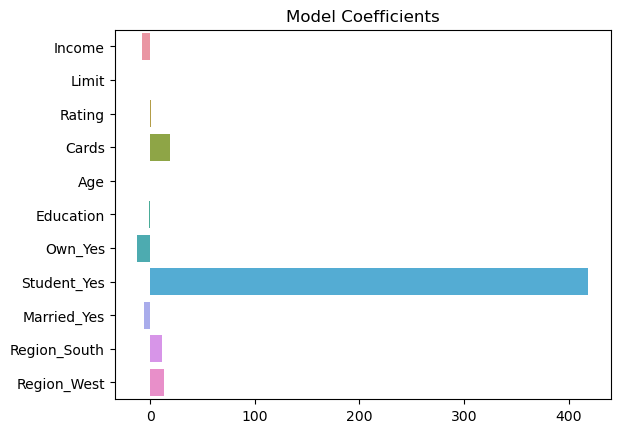

In [27]:
# Visualize crude measure of feature importance:
sns.barplot(data = coefs.T, orient = 'h').set(title='Model Coefficients')

In [38]:
# Fit a model to predict Balance from 2 predictors: Income and the best categorical from above (student_yes)
# Specify the best categorical feature:
best_cat_feature = 'Student_Yes'

# Define the model:
features = ['Income', best_cat_feature]
model3 = LinearRegression()
model3.fit(x_train_design[features], y_train)

# Collect betas from fitted model:
beta0 = model3.intercept_
beta1 = model3.coef_[features.index('Income')]
beta2 = model3.coef_[features.index(best_cat_feature)]

# Display betas in a DataFrame:
coefs = pd.DataFrame([beta0, beta1, beta2], index=['Intercept']+features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


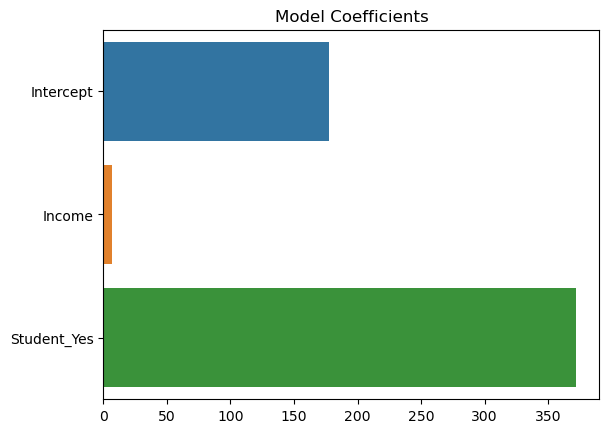

In [39]:
# Visualize crude measure of feature importance:
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');

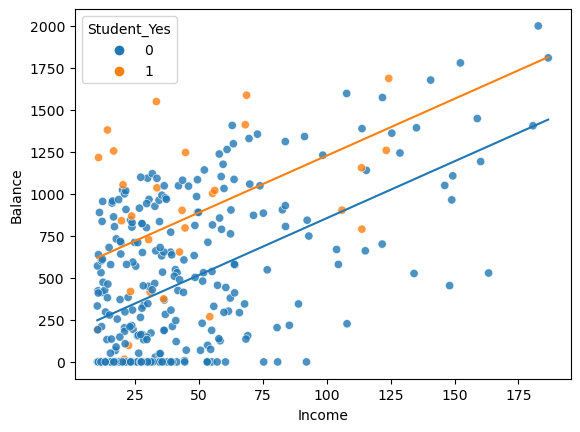

In [40]:
# Create space of x values to predict on:
x_space = np.linspace(x['Income'].min(), x['Income'].max(), 1000)
# Creating a range from min to max of the income data and generating 1000 items


# Generate 2 sets of predictions based on best categorical feature value
# When categorical feature is true/present (1)
y_hat_yes = beta0 + beta1 * x_space + beta2 * 1

# When categorical feature is false/absent (0)
y_hat_no = beta0 + beta1 * x_space + beta2 * 0

# Plot the 2 prediction lines for students and non-students:
ax = sns.scatterplot(data=pd.concat([x_train_design, y_train], axis =1), x='Income', y ='Balance', hue=best_cat_feature, alpha=0.8)
ax.plot(x_space, y_hat_no)
ax.plot(x_space, y_hat_yes);

---------------------------------

## Features on Different Scales

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Corefficient Interpretation on Different Scales

Below, we'll interpret a regression model's coefficients to understand the relationship between the predictors and the response.
We'll use the advertising data.

In [43]:
df_adv = pd.read_csv('datasets/advertising.csv')
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


All values are in thousands of dollars.
Again, we want to predict Sales from the various media advertising budgets.

So next we'll create our predictor matrix, X and response vector, y.

In [44]:
X = df_adv.drop('Sales', axis = 1)
y = df_adv.Sales.values

Which we can use to fit our linear regression model.

In [45]:
lm = LinearRegression().fit(X,y)

Now we inspect the predictor coefficient values derived from the fit.
These are the $\beta$ values that maximize our $R^2$ loss.

In [46]:
print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

# >9: right-aligned in a field of width 9.
# >6.3:  right-aligned in a field of width 6 with 3 digits after the decimal point.

Model Coefficients
       TV:  0.054
    Radio:  0.107
Newspaper:  0.000

R^2: 0.9026


As mentioned above, the original units are in thousands of dollars. To make discussion a bit simpler, we'll convert this to dollars by multiplying our original DataFrame by 1000. This will also help illustrate a point about **feature scaling**.

In [47]:
df_adv *= 1000
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230100.0,37800.0,69200.0,22100.0
1,44500.0,39300.0,45100.0,10400.0
2,17200.0,45900.0,69300.0,12000.0
3,151500.0,41300.0,58500.0,16500.0
4,180800.0,10800.0,58400.0,17900.0


What do you expect to happen to the coefficients of the model now that it's been fit on scaled up data?

In [48]:
# refit a new regression model on the scaled data:
X = df_adv.drop('Sales', axis = 1)
y = df_adv.Sales.values
lm = LinearRegression().fit(X,y)

print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

Model Coefficients
       TV:  0.054
    Radio:  0.107
Newspaper:  0.000

R^2: 0.9026


The coefficients and the loss are exactly the same. This is not a mistake. **Linear regression coefficients are invariant under scaling**. That's because we've scaled the entire data set (both the predictors *and* the response by the same amount).

If a \\$1,000 increase in the TV budget is associated with a $\beta$ thousand dollar increase in Sales, then a \\$1 increase in TB budget will result in an observed $\beta$ dollar increase in Sales.

Visual Interpretation

Let's create a visualization to help us interpret our model's coefficients.
We'll use a horizontal bar plot.

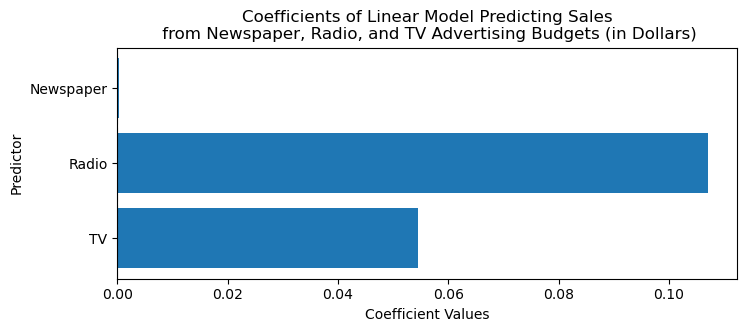

In [49]:
plt.figure(figsize=(8,3))
# Column names to be displayed on the y-axis
cols = X.columns
# Coefficient values from our fitted model (the intercept is not included)
coefs = lm.coef_
# Create the horizontal bar plot 
plt.barh(cols, coefs)
# Dotted, semi-transparent, black vertical line at zero
plt.axvline(0, c='k', ls='--', alpha=0.5)
# Always label your axes
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
# and create an informative title:
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (in Dollars)');

What happens when our predictors are not all on the same scale?
We'll change the units of the 3 budgets by converting them into different currencies. Use the following conversion rates for this exercise:

200 Sri Lankan Rupee = \$1

1,175 South Korean Won = \$1

6 Ghanaian Cedi = \$1


In [51]:
# Create a new DataFrame to store the converted budgets
X2 = pd.DataFrame()
X2['TV (Rupee)'] = 200 * df_adv['TV'] # convert to Sri Lankan Rupee
X2['Radio (Won)'] = 1175 * df_adv['Radio'] # convert to South Korean Won
X2['Newspaper (Cedi)'] = 6 * df_adv['Newspaper'] # convert to Ghanian Cedi

In [52]:
# We can use our original y as we have not converted the units for Sales
lm2 = LinearRegression().fit(X2, y)

Let's look at the coefficient values from the fit on the converted budgets.

In [54]:
print(f'{"Model Coefficients":>16}')
for col, coef in zip(X2.columns, lm2.coef_):
    print(f'{col:>16}: {coef:>8.5f}')
print(f'\nR^2: {lm2.score(X2,y):.4}')

Model Coefficients
      TV (Rupee):  0.00027
     Radio (Won):  0.00009
Newspaper (Cedi):  0.00006

R^2: 0.9026


**This time, scaling our predictors but not the response clearly caused a change in our coefficients.**

Now let's investigate how the coefficients changed relative to one another. Again, we'll use a helpful visualization.

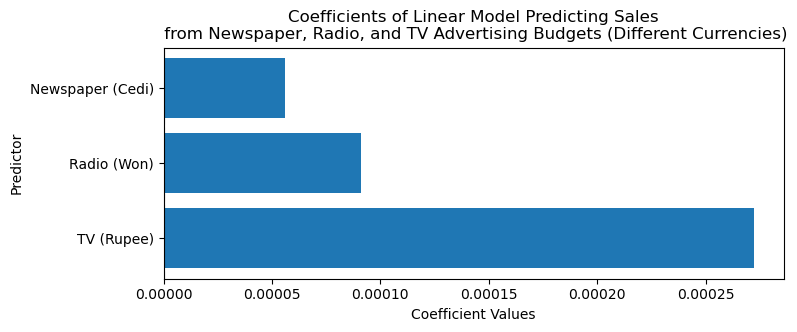

In [55]:
plt.figure(figsize=(8,3))
plt.barh(X2.columns, lm2.coef_)
plt.axvline(0, c='k', ls='--', alpha=0.5)
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (Different Currencies)');

Finally, it's important to recognize the limits of the x-axis differ between the two bar plots we've seen so far. We can better appreciate this difference by plotting both with a shared x-axis.

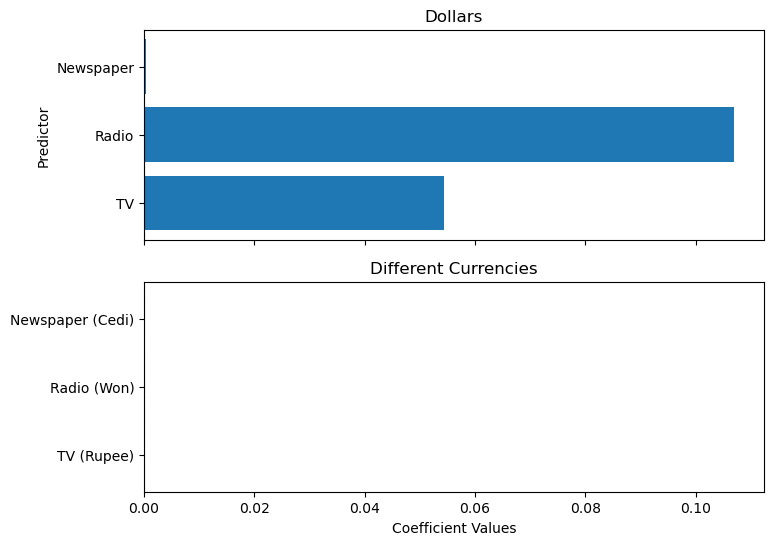

In [56]:
fig, axes = plt.subplots(2, 1, figsize = (8, 6), sharex = True)

axes[0].barh(X.columns, lm.coef_)
axes[0].set_title('Dollars');
axes[1].barh(X2.columns, lm2.coef_)
axes[1].set_title('Different Currencies')

for ax in axes:
    ax.axvline(0, c='k', ls='--', alpha=0.5)
axes[0].set_ylabel('Predictor')
axes[1].set_xlabel('Coefficient Values');

------------------------------------

## Multi-collinearity vs Model Predictions

In [70]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [71]:
df_colinearity = pd.read_csv('datasets/colinearity.csv')
df_colinearity.head()

,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


### Creation of Linear Regression Objects

In [72]:
# Choose all the predictiors as the variable 'X' (note the capitalization)
X = df_colinearity.drop(['y'], axis = 1)

# Choose the response variable 'y'
y = df_colinearity.y.values

In [73]:
# Initialize a list to store the beta values for each linear regression model
linear_coef = []

# Loop over all the predictors
# In each loop 'i' holds the name of the predictor
for i in X:

    # Set the current predictor as the variable x (lower case)
    x = df_colinearity[[i]]

    # Create a linear regression object:
    linreg = LinearRegression()

    # Fit the model with training data
    # Remember to choose only one column at a time (x not X)
    linreg.fit(x, y)

    linear_coef.append(linreg.coef_)


In [74]:
# Perform multiplinear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X, y)

# Get the coefficients of the multi model
multi_coef = multi_linear.coef_

In [78]:
# Helper code to see the beta values of the linear regression models:

print('By simple (one variable) linear regression for each variable:', sep = '\n')

for i in range(len(X.columns)):
    pprint(f'Value of beta{i + 1} = {linear_coef[i][0]:.2f}')

By simple (one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [79]:
# Helper code to compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')

By multi-Linear regression on all variables
'Value of beta1 = 2196095.38'
'Value of beta2 = 1464107.75'
'Value of beta3 = 732077.69'
'Value of beta4 = -732020.73'


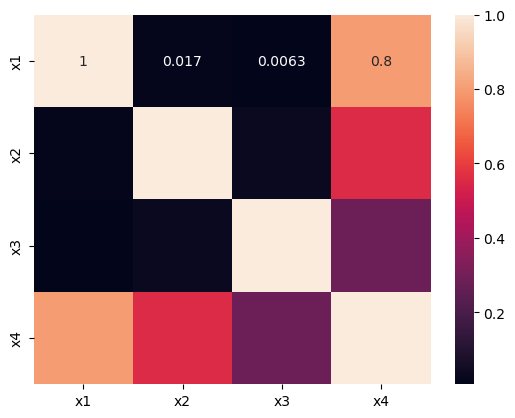

In [81]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = df_colinearity[['x1','x2','x3','x4']].corr() 
sns.heatmap(corrMatrix, annot=True) 
plt.show()
